In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
sns.set(style="ticks")

In [2]:
data = pd.read_csv("../covid-19-data/us-states.csv")
data['date'] = pd.to_datetime(data.date)
data['state'] = data.state.astype(str)
data.drop(['fips'], axis=1, inplace=True)
wiki = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")[0][['State','Population estimate, July 1, 2019[2]']]
wiki.columns = ['state', 'population']

data = pd.merge(data, wiki, on='state', how='inner')
data['case_pct'] = 100 * data.cases / data.population
data.set_index('date', inplace=True)

#adj_states = pd.read_table("https://introcs.cs.princeton.edu/java/data/contiguous-usa.dat", delimiter=' ', header=None, names=['st1', 'st2'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2133 entries, 2020-01-21 to 2020-04-10
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       2133 non-null   object 
 1   cases       2133 non-null   int64  
 2   deaths      2133 non-null   int64  
 3   population  2133 non-null   int64  
 4   case_pct    2133 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 100.0+ KB


In [4]:
data.groupby(['state'])[['cases', 'deaths', 'case_pct']].describe()

cases                                            \
                         count          mean           std   min     25%   
state                                                                      
Alabama                   29.0    898.689655    928.429707   6.0  106.00   
Alaska                    30.0     91.666667     82.256677   1.0   12.50   
American Samoa             2.0      0.000000      0.000000   0.0    0.00   
Arizona                   76.0    392.500000    814.138473   1.0    1.00   
Arkansas                  31.0    418.032258    387.215486   1.0   47.50   
California                77.0   2759.974026   5480.762260   1.0    7.00   
Colorado                  37.0   1847.324324   2139.335801   2.0  103.00   
Connecticut               34.0   2401.264706   3183.683071   1.0   47.75   
Delaware                  31.0    313.741935    389.236686   1.0   28.00   
District of Columbia      35.0    404.142857    493.645809   1.0   19.50   
Florida                   41.0   4032.195122   5622.545568   2.0   26.00   
Georgia                   40.0   2526.800000   3488.104365   2.0   31.00   
Guam                      27.0    133.444444    162.481557   3.0   21.00   
Hawaii                    36.0    143.861111    157.863441   1.0    6.25   
Idaho                     29.0    464.482759    508.748578   1.0   31.00   
Illinois                  78.0   1969.833333   4250.014070   1.0    2.00   
Indiana                   36.0   1587.277778   2163.487853   1.0   18.00   
Iowa                      34.0    356.000000    421.336258   3.0   23.75   
Kansas                    35.0    303.857143    372.022307   1.0   10.00   
Kentucky                  36.0    403.777778    502.148135   1.0   20.25   
Louisiana                 33.0   5030.575758   6351.360578   1.0  196.00   
Maine                     30.0    229.633333    199.378255   1.0   53.25   
Maryland                  37.0   1343.810811   1934.448929   3.0   27.00   
Massachusetts             70.0   2450.471429   5061.529627   1.0    1.00   
Michigan                  32.0   6314.625000   7508.524887   2.0   76.25   
Minnesota                 36.0    396.694444    418.181766   1.0   31.50   
Mississippi               31.0    738.032258    769.671120   1.0   42.00   
Missouri                  35.0    946.942857   1211.215674   1.0    7.00   
Montana                   29.0    144.413793    128.423829   4.0   19.00   
Nebraska                  54.0    112.925926    167.895279  10.0   13.00   
Nevada                    37.0    709.054054    841.925668   2.0   21.00   
New Hampshire             40.0    222.750000    284.213512   1.0    5.75   
New Jersey                38.0  12643.710526  17349.820605   1.0   56.25   
New Mexico                31.0    285.096774    321.265348   4.0   31.50   
New York                  41.0  42234.536585  54285.708070   1.0  217.00   
North Carolina            39.0    928.487179   1215.562505   1.0   17.00   
North Dakota              31.0     94.193548     93.102603   1.0   13.00   
Northern Mariana Islands  14.0      6.785714      3.445813   2.0    3.00   
Ohio                      33.0   1649.272727   1913.647879   3.0   67.00   
Oklahoma                  36.0    440.750000    575.413013   1.0    7.00   
Oregon                    43.0    357.930233    446.572897   1.0   13.50   
Pennsylvania              36.0   4149.333333   5950.309063   2.0   62.75   
Puerto Rico               29.0    207.448276    239.399634   3.0   14.00   
Rhode Island              41.0    335.000000    516.274685   2.0    5.00   
South Carolina            36.0    774.833333    953.322536   2.0   25.75   
South Dakota              32.0    113.437500    143.874932   5.0   11.00   
Tennessee                 37.0   1324.729730   1577.013116   1.0   32.00   
Texas                     59.0   1686.644068   3129.747901   1.0   10.00   
Utah                      46.0    463.695652    654.797199   1.0    3.00   
Vermont                   35.0    197.171429    222.054642   1.0   10.00 

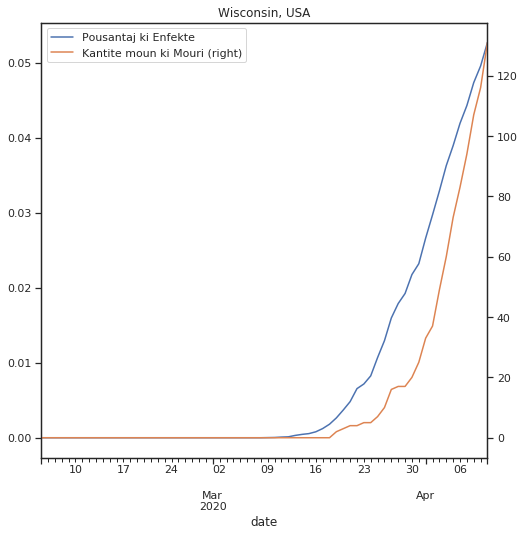

In [5]:
ax=data.query("state=='Wisconsin'")[['case_pct', 'deaths']].rename(columns={'case_pct':'Pousantaj ki Enfekte', 'deaths':'Kantite moun ki Mouri'}).plot(figsize=(8,8), secondary_y='Kantite moun ki Mouri', title="Wisconsin, USA")
fig = ax.get_figure()
fig.savefig(f"../writeups/images/WI.png")

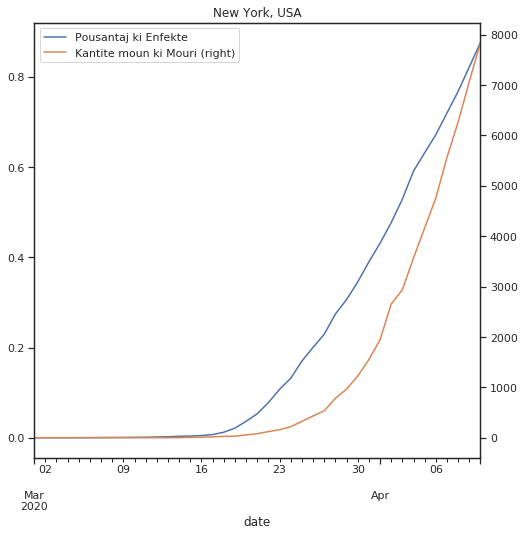

In [6]:
ax=data.query("state=='New York'")[['case_pct', 'deaths']].rename(columns={'case_pct':'Pousantaj ki Enfekte', 'deaths':'Kantite moun ki Mouri'}).plot(figsize=(8,8), secondary_y='Kantite moun ki Mouri', title="New York, USA")
fig = ax.get_figure()
fig.savefig(f"../writeups/images/NY.png")

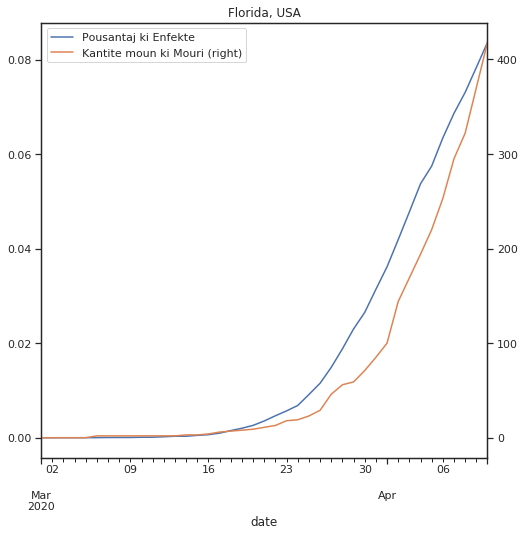

In [7]:
ax=data.query("state=='Florida'")[['case_pct', 'deaths']].rename(columns={'case_pct':'Pousantaj ki Enfekte', 'deaths':'Kantite moun ki Mouri'}).plot(figsize=(8,8), secondary_y='Kantite moun ki Mouri', title="Florida, USA")
fig = ax.get_figure()
fig.savefig(f"../writeups/images/FL.png")

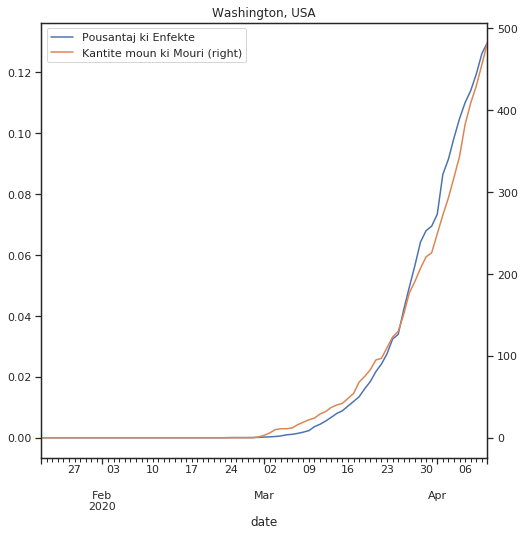

In [8]:
ax=data.query("state=='Washington'")[['case_pct', 'deaths']].rename(columns={'case_pct':'Pousantaj ki Enfekte', 'deaths':'Kantite moun ki Mouri'}).plot(figsize=(8,8), secondary_y='Kantite moun ki Mouri', title="Washington, USA")
fig = ax.get_figure()
fig.savefig(f"../writeups/images/WA.png")

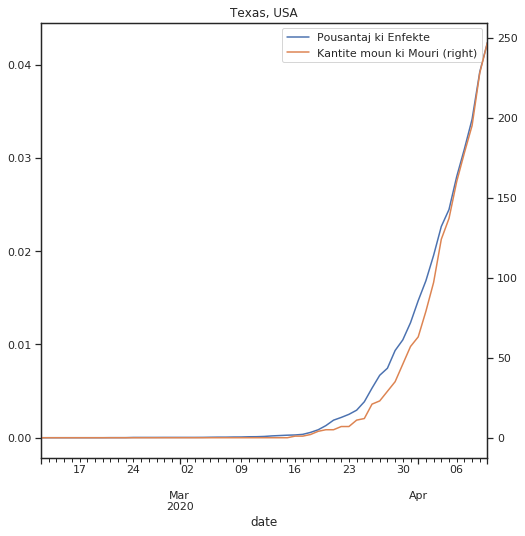

In [9]:
ax=data.query("state=='Texas'")[['case_pct', 'deaths']].rename(columns={'case_pct':'Pousantaj ki Enfekte', 'deaths':'Kantite moun ki Mouri'}).plot(figsize=(8,8), secondary_y='Kantite moun ki Mouri', title="Texas, USA")
fig = ax.get_figure()
fig.savefig(f"../writeups/images/TX.png")

In [10]:
data.query("state=='Alabama'")[['case_pct', 'deaths']]

,case_pct,deaths
date,,
2020-03-13,0.000122,0
2020-03-14,0.000245,0
2020-03-15,0.000469,0
2020-03-16,0.000591,0
2020-03-17,0.000795,0
2020-03-18,0.001040,0
2020-03-19,0.001591,0
2020-03-20,0.002162,0
2020-03-21,0.002672,0


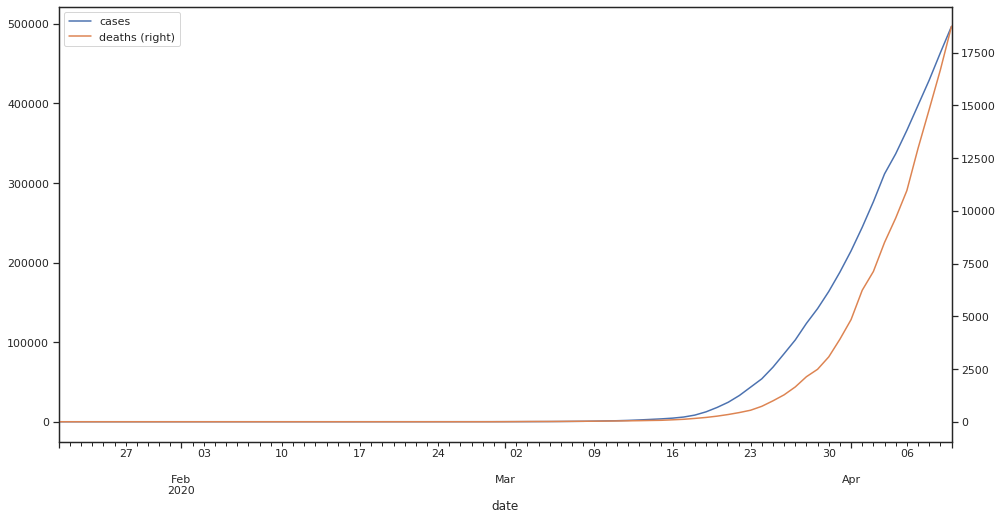

In [10]:
us = data.reset_index().groupby("date")[['cases','deaths']].sum()
#us['cases'] = us.cases/331_002_651
us.plot(secondary_y='deaths', figsize=(16,8))

In [23]:
58_004 / (1_076_017 + 58_004 + 225_335)

0.042670205597356396

In [25]:
us.tail()

,cases,deaths
date,,
2020-03-29,142171,2486
2020-03-30,163653,3073
2020-03-31,188019,3911
2020-04-01,214681,4841
2020-04-02,244191,6257
